In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [45]:
def wh2xy(Box):
    x1 = Box[0]
    y1 = Box[1]
    x2 = Box[0] + Box[2]
    y2 = Box[1] + Box[3]
    
    return [x1,y1,x2,y2]

In [75]:
def intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

In [30]:
predictions  = pd.read_excel("bounding box.xlsx", sheet_name=0,index_col = None)
ground_truth = pd.read_excel("bounding box.xlsx", sheet_name=1,index_col = None)

print(predictions)
print(ground_truth)

     x    y   w   h  score
0   13    7  21  28   0.84
1   18   39  31  23   0.79
2   55   72  34  36   0.89
3  110   27  10  17   0.96
4   24   98  21  34   0.47
5   34  148  39  24   0.39
6  124  136  29  35   0.74
7   92  153  27  47   0.29
8  118   35  18  25   0.62
     x    y   w   h
0  153   21  20  25
1  112   26   9  19
2  125  135  30  35
3   28  158  28  18
4   12    7  22  27


In [59]:
pred = []

for row in predictions.values:
    pred.append(wh2xy(row[0:4]) + [row[-1]])
    
pred = pd.DataFrame(pred)
print(pred)

       0      1      2      3     4
0   13.0    7.0   34.0   35.0  0.84
1   18.0   39.0   49.0   62.0  0.79
2   55.0   72.0   89.0  108.0  0.89
3  110.0   27.0  120.0   44.0  0.96
4   24.0   98.0   45.0  132.0  0.47
5   34.0  148.0   73.0  172.0  0.39
6  124.0  136.0  153.0  171.0  0.74
7   92.0  153.0  119.0  200.0  0.29
8  118.0   35.0  136.0   60.0  0.62


In [91]:
G_T = []
for row in ground_truth.values:
    G_T.append(wh2xy(row[0:4]))
    
G_T = pd.DataFrame(G_T)
print(G_T)

     0    1    2    3
0  153   21  173   46
1  112   26  121   45
2  125  135  155  170
3   28  158   56  176
4   12    7   34   34


In [94]:
matrix_of_IOU = []

for i in range(len(ground_truth)):
    tmp = []
    for j in range(len(pred)):
        tmp.append(intersection_over_union(G_T.loc[i].values,pred.loc[j].values))
    matrix_of_IOU.append(tmp)

In [137]:
for i in range(len(matrix_of_IOU)):
    for j in range(len(matrix_of_IOU[0])):
        print('{0:0.2f}'.format(matrix_of_IOU[i][j]),end='|')
    print('')

0.00|0.00|0.00|0.00|0.00|0.00|0.00|0.00|0.00|
0.00|0.00|0.00|0.69|0.00|0.00|0.00|0.00|0.07|
0.00|0.00|0.00|0.00|0.00|0.00|0.86|0.00|0.00|
0.00|0.00|0.00|0.00|0.00|0.29|0.00|0.00|0.00|
0.92|0.00|0.00|0.00|0.00|0.00|0.00|0.00|0.00|


In [120]:
img = np.ones((210,200,3),dtype=np.uint8)
img = img * 255

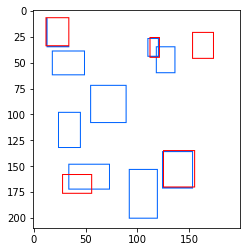

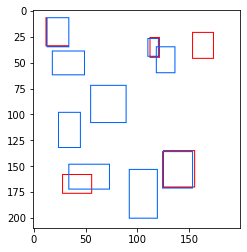

In [122]:
for row in G_T.values:
    cv2.rectangle(img,(int(row[0]),int(row[1])),(int(row[2]),int(row[3])),color=(255,0,0))

plt.imshow(img)    
  
for row in pred.values:
    cv2.rectangle(img,(int(row[0]),int(row[1])),(int(row[2]),int(row[3])),color=(0,100,255))

plt.figure()
plt.imshow(img)
plt.imsave('Fig5.jpg',img,dpi=300)

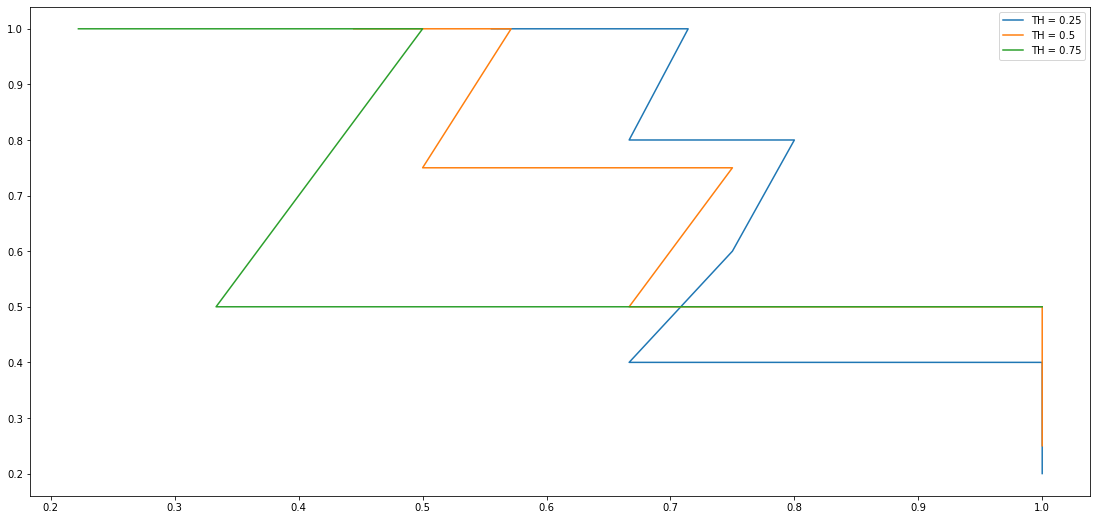

In [144]:
P_T1 = [1,1,0.666666667,0.75,0.8,0.666666667,0.714285714,0.625,0.555555556]
R_T1 = [0.2,0.4,0.4,0.6,0.8,0.8,1,1,1]

P_T2 = [1,1,0.666666667,0.75,0.6,0.5,0.571428571,0.5,0.444444444]
R_T2 = [0.25,0.5,0.5,0.75,0.75,0.75,1,1,1]

P_T3 = [1,0.5,0.333333333,0.5,0.4,0.333333333,0.285714286,0.25,0.222222222]
R_T3 = [0.5,0.5,0.5,1,1,1,1,1,1]

plt.figure(figsize=(19,9))
ax = plt.plot(P_T1,R_T1,label='TH = 0.25')
plt.plot(P_T2,R_T2,label='TH = 0.5')
plt.plot(P_T3,R_T3,label='TH = 0.75')
plt.legend()

plt.savefig('Fig8.jpg',dpi= 500)